SINAV ÇALIŞMASIDIR

In [1]:
# KOD BLOĞU #1: Kütüphaneleri İçe Aktarma ve Veriyi Yükleme

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Makine öğrenmesi için gerekli araçlar
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve

# Kullanacağımız 3 farklı tahmin modeli
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# CSV dosyasından müşteri verilerini okuyoruz
df = pd.read_csv("data/yeni_calisanlar.csv",
                 sep=';',
                 encoding='utf-8',
                 na_values=['', ' ', 'NA', 'N/A', 'nan', 'NaN', 'null'],
                 keep_default_na=True,
                 skipinitialspace=True)


# ================================================================
# DİNAMİK KONFIGÜRASYON (Herhangi bir veri seti için ayarlanabilir)

# Hedef kolon (None = otomatik tespit)
TARGET_COLUMN = 'Istifa'  # Hedef kolon: Istıfa

# Özellik Mühendisliği (False = atla, True = akıllı tespit)
ENABLE_FEATURE_ENGINEERING = True

# ================================================================

# KOLON NUMARALAMA SİSTEMİ
def create_column_mapping(dataframe):
    "Datadaki tüm kolonları numaralandırıyorum, data değişse bile static olan bu kod çalışır."
    return {i+1: col for i, col in enumerate(dataframe.columns)}

def get_column_name(col_map, col_no):
    """Kolon numarasından kolon adını döndürür."""
    return col_map.get(col_no, None)

def get_column_number(col_map, col_name):
    """Kolon adından kolon numarasını döndürür."""
    for num, name in col_map.items():
        if name == col_name:
            return num
    return None

# İlk kolon haritasını oluştur
COLUMN_MAP = create_column_mapping(df)

# Kolon listesini yazdır
print("=" * 10)
print("KOLON NUMARALARI")
print("=" * 10)
for num, name in COLUMN_MAP.items():
    print(f"[{num:2}] {name}")
print("=" * 10)

# İlk 5 satırı inceliyoruz
df.head()

KOLON NUMARALARI
[ 1] Yas
[ 2] Departman
[ 3] Evden_Uzaklik
[ 4] Egitim_Seviyesi
[ 5] Egitim_Alani
[ 6] Cinsiyet
[ 7] Is_Memnuniyeti
[ 8] Medeni_Durum
[ 9] Aylik_Gelir
[10] Onceki_Sirket_Sayisi
[11] Fazla_Mesai
[12] Toplam_Calisma_Yili
[13] Sirketteki_Yil
[14] Son_Terfi_Suresi
[15] Is_Seyahati
[16] Is_Yasam_Dengesi
[17] Is_Seviyesi
[18] Maas_Artis_Yuzdesi
[19] Ortam_Memnuniyeti
[20] Mevcut_Mudurle_Yil
[21] Istifa


,Yas,Departman,Evden_Uzaklik,Egitim_Seviyesi,Egitim_Alani,Cinsiyet,Is_Memnuniyeti,Medeni_Durum,Aylik_Gelir,Onceki_Sirket_Sayisi,...,Toplam_Calisma_Yili,Sirketteki_Yil,Son_Terfi_Suresi,Is_Seyahati,Is_Yasam_Dengesi,Is_Seviyesi,Maas_Artis_Yuzdesi,Ortam_Memnuniyeti,Mevcut_Mudurle_Yil,Istifa
0,41,Satış,1.0,2,Yaşam Bilimleri,Kadın,4,Bekar,5993,8,...,8,6,0,Nadiren_Seyahat,1,2,11,2,5,Evet
1,49,Araştırma ve Geliştirme,8.0,1,Yaşam Bilimleri,Erkek,2,Evli,5130,1,...,10,10,1,Sık_Seyahat,3,2,23,3,7,Hayır
2,37,Araştırma ve Geliştirme,2.0,2,Diğer,Erkek,3,Bekar,2090,6,...,7,0,0,Nadiren_Seyahat,3,1,15,4,0,Evet
3,33,Araştırma ve Geliştirme,3.0,4,Yaşam Bilimleri,Kadın,3,Evli,2909,1,...,8,8,3,Sık_Seyahat,3,1,11,4,0,Hayır
4,27,Araştırma ve Geliştirme,2.0,1,Tıp,Erkek,2,Evli,3468,9,...,6,2,2,Nadiren_Seyahat,3,1,12,1,2,Hayır


VERİ SETİ ANALİZİ

Veri Boyutu: 1470 satır, 21 kolon

⚠️ TOPLAM NaN DEĞER: 5

Kolonlara Göre NaN Dağılımı:
    [ 2] Departman                      :    3 NaN (0.2%)
    [ 3] Evden_Uzaklik                  :    2 NaN (0.1%)

----------
KOLON TİP ANALİZİ
----------

 NO | KOLON ADI            | MEVCUT TİP | TAHMİN          | DURUM     
[ 1] | Yas                  | int64      | numeric_int     | OK
[ 2] | Departman            | object     | categorical     | OK
[ 3] | Evden_Uzaklik        | float64    | numeric_int     | OK
[ 4] | Egitim_Seviyesi      | int64      | numeric_int     | OK
[ 5] | Egitim_Alani         | object     | categorical     | OK
[ 6] | Cinsiyet             | object     | categorical     | OK
[ 7] | Is_Memnuniyeti       | int64      | numeric_int     | OK
[ 8] | Medeni_Durum         | object     | categorical     | OK
[ 9] | Aylik_Gelir          | int64      | numeric_int     | OK
[10] | Onceki_Sirket_Sayisi | int64      | numeric_int     | OK
[11] | Fazla_Mesai      

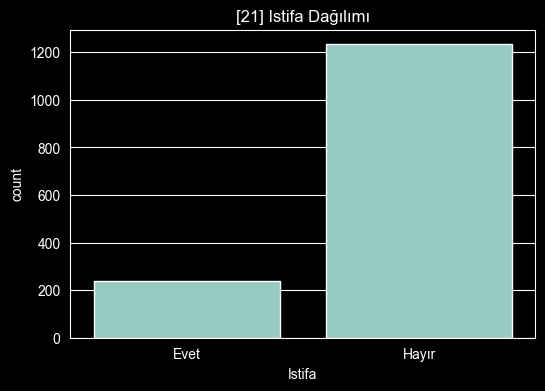

Istifa
Hayır    1233
Evet      237
Name: count, dtype: int64
\n----------
KORELASYON ANALİZİ
----------


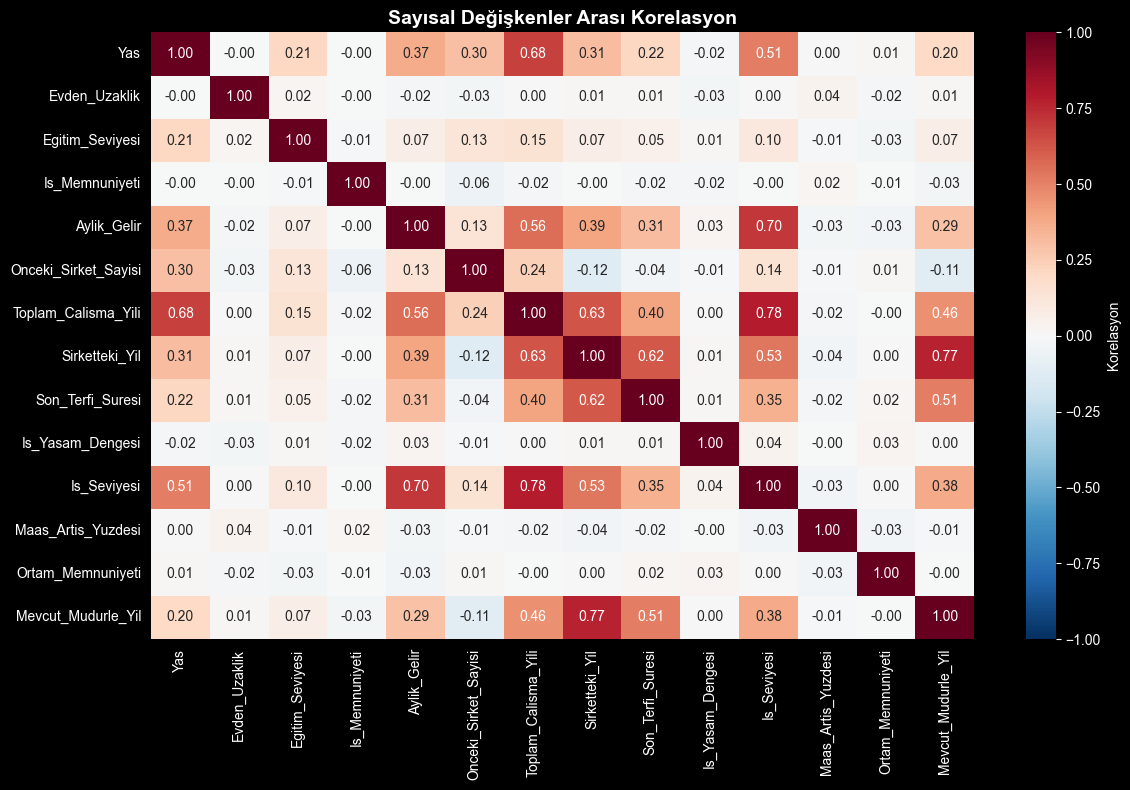

\n==========


In [2]:
# KOD BLOĞU #2: Veriyi İnceleme ve Keşfetme (KOLON NUMARALARIYLA)

print("=" * 10)
print("VERİ SETİ ANALİZİ")
print("=" * 10)

# Veri boyutu bilgisi
print(f"\nVeri Boyutu: {df.shape[0]} satır, {df.shape[1]} kolon")

# NaN Değerleri Kontrol Et
total_nan = df.isna().sum().sum()
if total_nan > 0:
    print(f"\nTOPLAM NaN DEĞER: {total_nan}")
    print("\nKolonlara Göre NaN Dağılımı:")
    nan_cols = df.isna().sum()
    nan_cols = nan_cols[nan_cols > 0].sort_values(ascending=False)
    for col, count in nan_cols.items():
        col_no = get_column_number(COLUMN_MAP, col)
        percentage = (count / len(df)) * 100
        print(f"    [{col_no:2}] {col:30} : {count:4} NaN ({percentage:.1f}%)")
else:
    print("\n✓ NaN değer bulunamadı")

# Veri tiplerini inceleme
print("\n" + "-" * 10)
print("KOLON TİP ANALİZİ")
print("-" * 10)

def infer_real_dtype(series):
    """
    Bir kolonun gerçek veri tipini tahmin eder.
    İlk 5 ve son 5 satırdaki değerlere bakarak karar verir.
    """
    sample = pd.concat([series.head(5), series.tail(5)]).dropna()

    if len(sample) == 0:
        return 'unknown'

    # Sayıya çevirmeyi dene
    try:
        numeric_sample = pd.to_numeric(sample.astype(str).str.strip(), errors='coerce')
        success_rate = numeric_sample.notna().sum() / len(sample)

        if success_rate >= 0.8:
            if (numeric_sample.dropna() % 1 == 0).all():
                return 'numeric_int'
            else:
                return 'numeric_float'
    except:
        pass

    # Kategorik mi kontrol et
    unique_count = series.nunique()
    total_count = len(series)

    if unique_count <= max(10, int(total_count * 0.05)):
        return 'categorical'

    # ID kontrolü (tüm değerler benzersiz mi?)
    if unique_count == total_count:
        return 'id'

    return 'text'

# Analiz sonuçlarını sakla
analysis_results = {}
id_columns = []
suspicious_columns = []

# Hedef kolon: Önce manuel ayarı kontrol et
if TARGET_COLUMN and TARGET_COLUMN in df.columns:
    target_column = TARGET_COLUMN
    print(f"✓ Manuel hedef kolon ayarı: {TARGET_COLUMN}\n")
else:
    target_column = None

print(f"\n{'NO':>3} | {'KOLON ADI':<20} | {'MEVCUT TİP':<10} | {'TAHMİN':<15} | {'DURUM':<10}")

for col_no, col_name in COLUMN_MAP.items():
    current_dtype = str(df[col_name].dtype)
    inferred_type = infer_real_dtype(df[col_name])

    # Durumu belirle
    status = "OK"

    # ID sütunu mu?
    if inferred_type == 'id':
        status = "ID (Silinecek)"
        id_columns.append(col_name)

    # Tip uyumsuzluğu var mı?
    elif current_dtype == 'object' and inferred_type in ['numeric_int', 'numeric_float']:
        status = "UYUMSUZ"
        suspicious_columns.append(col_name)

    # Hedef sütun mu? (otomatik tespit - sadece manuel ayar yoksa)
    if target_column is None:
        target_keywords = ['churn', 'target', 'label', 'class', 'outcome', 'fraud', 'attrition', 'default', 'istifa','Istifa']
        if any(kw in col_name.lower() for kw in target_keywords):
            if df[col_name].nunique() == 2:
                status = "HEDEF"
                target_column = col_name

    # Sonuçları kaydet
    analysis_results[col_no] = {
        'name': col_name,
        'current_dtype': current_dtype,
        'inferred_type': inferred_type,
        'status': status
    }

    print(f"[{col_no:2}] | {col_name:<20} | {current_dtype:<10} | {inferred_type:<15} | {status}")

# Özet
print("\n" + "=" * 10)
print("ANALİZ ÖZETİ")

if id_columns:
    id_nums = [get_column_number(COLUMN_MAP, c) for c in id_columns]
    print(f"ID Kolonları (silinecek): {id_nums} → {id_columns}")

if suspicious_columns:
    susp_nums = [get_column_number(COLUMN_MAP, c) for c in suspicious_columns]
    print(f"Uyumsuz Kolonlar (düzeltilecek): {susp_nums} → {suspicious_columns}")

if target_column:
    target_num = get_column_number(COLUMN_MAP, target_column)
    print(f"Hedef Kolon: [{target_num}] → {target_column}")

# Uyumsuz kolonların detaylı incelenmesi
if suspicious_columns:
    print("\n" + "-" * 10)
    print("UYUMSUZ KOLON DETAYLARI")
    print("-" * 10)

    for col_name in suspicious_columns:
        col_no = get_column_number(COLUMN_MAP, col_name)
        print(f"\n[{col_no}] {col_name}:")
        print(f"    İlk 5 değer: {df[col_name].head(5).tolist()}")

        # Boşluk karakteri kontrolü
        blank_count = (df[col_name].astype(str).str.strip() == '').sum()
        if blank_count > 0:
            print(f"    Boş değer sayısı: {blank_count}")

# Hedef değişken grafiği
if target_column:
    print("\n" + "-" * 10)
    print(f"HEDEF DEĞİŞKEN DAĞILIMI: [{get_column_number(COLUMN_MAP, target_column)}] {target_column}")
    print("-" * 10)

    plt.figure(figsize=(6,4))
    sns.countplot(x=target_column, data=df)
    plt.title(f"[{get_column_number(COLUMN_MAP, target_column)}] {target_column} Dağılımı")
    plt.show()

    print(df[target_column].value_counts())

# Korelasyon Analizi
print("\\n" + "-" * 10)
print("KORELASYON ANALİZİ")
print("-" * 10)

# Sadece sayısal kolonları seç
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_cols) >= 2:
    corr_matrix = df[numeric_cols].corr()

    # Heatmap çiz
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="RdBu_r",
                center=0, vmin=-1, vmax=1, cbar_kws={'label': 'Korelasyon'})
    plt.title("Sayısal Değişkenler Arası Korelasyon", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Hedef değişkenle en yüksek korelasyonları bul
    if target_column and target_column in corr_matrix.columns:
        target_corr = corr_matrix[target_column].abs().sort_values(ascending=False)
        print(f"\\n[{target_column}] ile en yüksek korelasyonlar:")
        for i, (col, val) in enumerate(target_corr.head(6).items()):
            if col != target_column:
                col_no = get_column_number(COLUMN_MAP, col)
                print(f"    [{col_no}] {col}: {val:.3f}")
else:
    print("Yeteri kadar sayısal kolon bulunamadı.")

print("\\n" + "=" * 10)


VERİ TEMİZLEME

[1] ID Kolonlarının Silinmesi:
----------
ID kolonu bulunamadı

[2] Uyumsuz Kolonların Düzeltilmesi:
----------
Düzeltilecek kolon bulunamadı

[3] Hedef Değişken Dönüşümü:
----------
Hedef kolon: [21] Istifa
Mevcut değerler: ['Evet', 'Hayır']
Dönüşüm: {'Evet': 1, 'Hayır': 0}

[4] Kategorik Verilerin Dönüştürülmesi (One-Hot Encoding):
----------
Kategorik kolonlar: [2, 5, 6, 8, 11, 15]
Kolon adları: ['Departman', 'Egitim_Alani', 'Cinsiyet', 'Medeni_Durum', 'Fazla_Mesai', 'Is_Seyahati']
    ✓ [2] Departman: 3 NaN değer 'Araştırma ve Geliştirme' ile dolduruldu
✓ One-Hot Encoding uygulandı
Yeni kolon sayısı: 28

[5] Özellik Mühendisliği:
----------
Zaman kolonu bulunamadı
13 binary özellik tespit edildi
NEW_ActiveFeatureCount oluşturuldu
Ortalama: 3.38
Min: 0, Max: 6
    ✓ 27 sayısal kolon bulundu
NEW_Ratio_1_2 = [1]Yas / [2]Evden_Uzaklik

 Toplam 2 yeni özellik eklendi

[6] Aykırı Değer Analizi (IQR Yöntemi):
----------
    [5] Aylik_Gelir: 114 aykırı değer (7.8%)
    [6] 

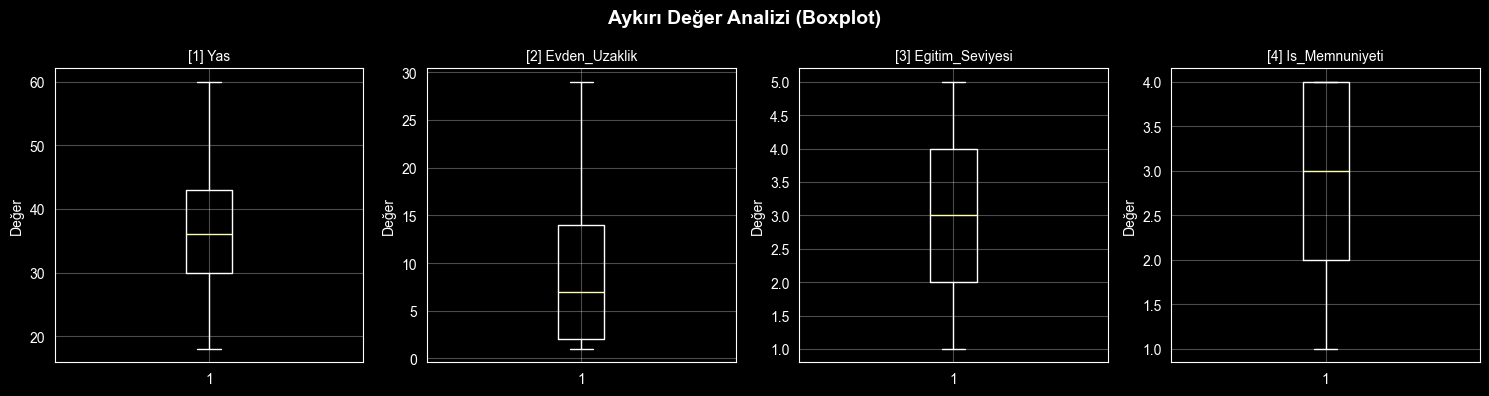


    Aykırı Değer Detayları:
    [5] Aylik_Gelir:
Alt sınır: -5291.00
Üst sınır: 16581.00
Min değer: 1009.00
Max değer: 195537.00
    [6] Onceki_Sirket_Sayisi:
Alt sınır: -3.50
Üst sınır: 8.50
Min değer: 0.00
Max değer: 9.00
    [7] Toplam_Calisma_Yili:
Alt sınır: -7.50
Üst sınır: 28.50
Min değer: 0.00
Max değer: 40.00
    [8] Sirketteki_Yil:
Alt sınır: -6.00
Üst sınır: 18.00
Min değer: 0.00
Max değer: 40.00
    [9] Son_Terfi_Suresi:
Alt sınır: -4.50
Üst sınır: 7.50
Min değer: 0.00
Max değer: 15.00
    [14] Mevcut_Mudurle_Yil:
Alt sınır: -5.50
Üst sınır: 14.50
Min değer: 0.00
Max değer: 17.00
    [17] Departman_İnsan Kaynakları:
Alt sınır: 0.00
Üst sınır: 0.00
Min değer: 0.00
Max değer: 1.00
    [18] Egitim_Alani_Pazarlama:
Alt sınır: 0.00
Üst sınır: 0.00
Min değer: 0.00
Max değer: 1.00
    [19] Egitim_Alani_Teknik Derece:
Alt sınır: 0.00
Üst sınır: 0.00
Min değer: 0.00
Max değer: 1.00
    [22] Egitim_Alani_İnsan Kaynakları:
Alt sınır: 0.00
Üst sınır: 0.00
Min değer: 0.00
Max değer: 1.

,Yas,Evden_Uzaklik,Egitim_Seviyesi,Is_Memnuniyeti,Aylik_Gelir,Onceki_Sirket_Sayisi,Toplam_Calisma_Yili,Sirketteki_Yil,Son_Terfi_Suresi,Is_Yasam_Dengesi,...,Egitim_Alani_Yaşam Bilimleri,Egitim_Alani_İnsan Kaynakları,Cinsiyet_Kadın,Medeni_Durum_Boşanmış,Medeni_Durum_Evli,Fazla_Mesai_Hayır,Is_Seyahati_Seyahat_Etmiyor,Is_Seyahati_Sık_Seyahat,NEW_ActiveFeatureCount,NEW_Ratio_1_2
0,41,1.0,2,4,5993,8,8,6,0,1,...,1,0,1,0,0,0,0,0,3,41.000
1,49,8.0,1,2,5130,1,10,10,1,3,...,1,0,0,0,1,1,0,1,4,6.125
2,37,2.0,2,3,2090,6,7,0,0,3,...,0,0,0,0,0,0,0,0,0,18.500
3,33,3.0,4,3,2909,1,8,8,3,3,...,1,0,1,0,1,0,0,1,4,11.000
4,27,2.0,1,2,3468,9,6,2,2,3,...,0,0,0,0,1,1,0,0,3,13.500


In [3]:
# KOD BLOĞU #3: Veri Temizleme ve Hazırlama (KOLON NUMARALARIYLA)

print("=" * 10)
print("VERİ TEMİZLEME")

# 1. ID KOLONLARINI SİL
print("\n[1] ID Kolonlarının Silinmesi:")
print("-" * 10)

if id_columns:
    for col_name in id_columns:
        col_no = get_column_number(COLUMN_MAP, col_name)
        print(f"    [{col_no}] {col_name} siliniyor...")
    df = df.drop(id_columns, axis=1)
    print(f"Silinen kolon sayısı: {len(id_columns)}")
else:
    print("ID kolonu bulunamadı")

# Kolon haritasını güncelle
COLUMN_MAP = create_column_mapping(df)

# 2. UYUMSUZ KOLONLARI DÜZELT
print("\n[2] Uyumsuz Kolonların Düzeltilmesi:")
print("-" * 10)

if suspicious_columns:
    for col_name in suspicious_columns:
        if col_name in df.columns:
            col_no = get_column_number(COLUMN_MAP, col_name)

            # Mevcut NaN sayısı
            initial_nan = df[col_name].isna().sum()

            # Sayıya çevir
            df[col_name] = pd.to_numeric(df[col_name], errors='coerce')

            # Eksik değerleri medyan ile doldur
            missing_count = df[col_name].isna().sum()
            if missing_count > 0:
                median_val = df[col_name].median()

                # Eğer tüm değerler NaN ise, 0 ile doldur
                if pd.isna(median_val):
                    df[col_name] = df[col_name].fillna(0)
                    print(f"    [{col_no}] {col_name}: Tüm değerler NaN, 0 ile dolduruldu")
                else:
                    df[col_name] = df[col_name].fillna(median_val)
                    conversion_nan = missing_count - initial_nan
                    print(f"    [{col_no}] {col_name}: {missing_count} NaN ({conversion_nan} dönüşüm hatası) medyan ({median_val:.2f}) ile dolduruldu")
            else:
                print(f"    [{col_no}] {col_name}: Sayıya çevrildi, eksik değer yok")
else:
    print("Düzeltilecek kolon bulunamadı")

# 3. HEDEF DEĞİŞKENİ DÖNÜŞTÜR
print("\n[3] Hedef Değişken Dönüşümü:")
print("-" * 10)

if target_column and target_column in df.columns:
    target_no = get_column_number(COLUMN_MAP, target_column)
    print(f"Hedef kolon: [{target_no}] {target_column}")

    # NaN değerlerini kontrol et
    nan_count = df[target_column].isna().sum()
    if nan_count > 0:
        print(f"⚠️ UYARI: Hedef kolonda {nan_count} NaN değer bulundu!")
        # NaN değerleri en sık görülen değerle doldur (mode)
        mode_value = df[target_column].mode()[0] if len(df[target_column].mode()) > 0 else df[target_column].value_counts().index[0]
        df[target_column] = df[target_column].fillna(mode_value)
        print(f"✓ NaN değerler '{mode_value}' ile dolduruldu")

    print(f"Mevcut değerler: {df[target_column].unique().tolist()}")

    # Eğer object tipindeyse sayıya çevir
    if df[target_column].dtype == 'object':
        unique_vals = df[target_column].dropna().unique()
        positive_keywords = ['yes', 'true', '1', 'positive', 'churn', 'evet', 'istifa']

        target_map = {}
        for val in unique_vals:
            val_lower = str(val).lower().strip()
            if any(kw in val_lower for kw in positive_keywords):
                target_map[val] = 1
            else:
                target_map[val] = 0

        df[target_column] = df[target_column].map(target_map)
        print(f"Dönüşüm: {target_map}")

        # Dönüşüm sonrası NaN kontrolü
        post_nan = df[target_column].isna().sum()
        if post_nan > 0:
            print(f"⚠️ Dönüşüm sonrası {post_nan} NaN değer oluştu, 0 ile doldruluyor...")
            df[target_column] = df[target_column].fillna(0)
    else:
        print(f"Zaten sayısal tipte: {df[target_column].dtype}")
else:
    # Kod Bloğu #2'de hedef tespit edilmemişse, otomatik ara
    print("Hedef kolon Kod Bloğu #2'de tespit edilmedi, otomatik arama yapılıyor...")
    target_keywords = ['churn', 'target', 'label', 'class', 'outcome', 'fraud', 'attrition', 'default', 'istifa', 'ayrilma']

    found = False
    for col in df.columns:
        if any(kw in col.lower() for kw in target_keywords):
            if df[col].nunique() <= 3:  # Binary veya ternary sınıflandırma
                target_column = col
                target_no = get_column_number(COLUMN_MAP, target_column)
                print(f"Otomatik tespit: [{target_no}] {target_column}")

                # NaN kontrolü
                nan_count = df[target_column].isna().sum()
                if nan_count > 0:
                    mode_value = df[target_column].mode()[0] if len(df[target_column].mode()) > 0 else df[target_column].value_counts().index[0]
                    df[target_column] = df[target_column].fillna(mode_value)
                    print(f"✓ {nan_count} NaN değer '{mode_value}' ile dolduruldu")

                # Dönüşüm
                if df[target_column].dtype == 'object':
                    unique_vals = df[target_column].dropna().unique()
                    positive_kw = ['yes', 'true', '1', 'positive', 'churn', 'fraud', 'default', 'evet', 'istifa']

                    target_map = {}
                    for val in unique_vals:
                        val_lower = str(val).lower().strip()
                        target_map[val] = 1 if any(kw in val_lower for kw in positive_kw) else 0

                    df[target_column] = df[target_column].map(target_map)
                    print(f"Dönüşüm: {target_map}")

                    # Dönüşüm sonrası NaN kontrolü
                    post_nan = df[target_column].isna().sum()
                    if post_nan > 0:
                        df[target_column] = df[target_column].fillna(0)

                found = True
                break

    if not found:
        raise ValueError("Hedef değişken tespit edilemedi! Lütfen manuel olarak belirtin.")

# 4. KATEGORİK VERİLERİ DÖNÜŞTÜR
print("\n[4] Kategorik Verilerin Dönüştürülmesi (One-Hot Encoding):")
print("-" * 10)

# Object tipindeki kolonları bul (hedef hariç)
categorical_cols = df.select_dtypes(include='object').columns.tolist()

if target_column in categorical_cols:
    categorical_cols.remove(target_column)

if categorical_cols:
    cat_nums = [get_column_number(COLUMN_MAP, c) for c in categorical_cols]
    print(f"Kategorik kolonlar: {cat_nums}")
    print(f"Kolon adları: {categorical_cols}")

    # NaN değerlerini kontrol et ve doldur
    for col in categorical_cols:
        nan_count = df[col].isna().sum()
        if nan_count > 0:
            # En sık görülen değerle doldur
            mode_val = df[col].mode()[0] if len(df[col].mode()) > 0 else 'Unknown'
            df[col] = df[col].fillna(mode_val)
            print(f"    ✓ [{get_column_number(COLUMN_MAP, col)}] {col}: {nan_count} NaN değer '{mode_val}' ile dolduruldu")

    # One-Hot Encoding uygula
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)
    print(f"✓ One-Hot Encoding uygulandı")
    print(f"Yeni kolon sayısı: {len(df.columns)}")
else:
    print("Kategorik kolon bulunamadı")

# Kolon haritasını güncelle
COLUMN_MAP = create_column_mapping(df)

# 5. ÖZELLİK MÜHENDİSLİĞİ (Feature Engineering)
print("\n[5] Özellik Mühendisliği:")
print("-" * 10)

if not ENABLE_FEATURE_ENGINEERING:
    print("KAPATILDI (ENABLE_FEATURE_ENGINEERING = False)")
else:
    new_features_created = False

    # ====================================================================
    # 5.1. ZAMAN BAZLI ÖZELLIK (Tenure, Duration, Age vb.)

    # Zaman/süre kolonlarını otomatik tespit et
    time_keywords = ['tenure', 'duration', 'age', 'days', 'months', 'years', 'time']
    time_cols = [col for col in df.select_dtypes(include=[np.number]).columns
                 if any(kw in col.lower() for kw in time_keywords)]

    if time_cols:
        # İlk bulunan zaman kolonunu kullan
        time_col = time_cols[0]
        col_no = get_column_number(COLUMN_MAP, time_col)
        print(f"Zaman kolonu tespit edildi: [{col_no}] {time_col}")

        # Gruplama (quartile bazlı - veri setine bağımsız)
        q1 = df[time_col].quantile(0.25)
        q2 = df[time_col].quantile(0.50)
        q3 = df[time_col].quantile(0.75)

        def create_time_group(value):
            if value <= q1: return "Q1_Dusuk"
            elif value <= q2: return "Q2_Orta_Alt"
            elif value <= q3: return "Q3_Orta_Ust"
            else: return "Q4_Yuksek"

        df['NEW_TimeGroup'] = df[time_col].apply(create_time_group)
        print(f"NEW_TimeGroup oluşturuldu (Quartile bazlı)")
        print(f"Dağılım: {dict(df['NEW_TimeGroup'].value_counts())}")
        new_features_created = True
    else:
        print(f"Zaman kolonu bulunamadı")

    # ====================================================================
    # 5.2. SERVİS/ÜRÜN SAYISI (Binary kolonlardan toplam)
    # ====================================================================

    # Binary kolonları bul (Yes/No, True/False, 1/0)
    binary_cols = []
    for col in df.columns:
        if col == target_column:  # Hedef kolonu hariç
            continue
        unique_vals = df[col].dropna().unique()
        if len(unique_vals) == 2:
            # String tipinde Yes/No kontrolü
            if df[col].dtype == 'object':
                vals_lower = [str(v).lower() for v in unique_vals]
                if any(v in ['yes', 'no', 'true', 'false'] for v in vals_lower):
                    binary_cols.append(col)
            # Sayısal tipinde 0/1 kontrolü
            elif df[col].dtype in [np.int64, np.float64]:
                if set(unique_vals).issubset({0, 1, 0.0, 1.0}):
                    binary_cols.append(col)

    if binary_cols:
        print(f"{len(binary_cols)} binary özellik tespit edildi")

        # Toplam 'Yes' veya 1 sayısını hesapla
        def count_active_features(row):
            count = 0
            for col in binary_cols:
                val = row[col]
                # String kontrolü
                if isinstance(val, str) and val.lower() in ['yes', 'true', '1']:
                    count += 1
                # Sayısal kontrolü
                elif val in [1, 1.0, True]:
                    count += 1
            return count

        df['NEW_ActiveFeatureCount'] = df[binary_cols].apply(count_active_features, axis=1)
        print(f"NEW_ActiveFeatureCount oluşturuldu")
        print(f"Ortalama: {df['NEW_ActiveFeatureCount'].mean():.2f}")
        print(f"Min: {df['NEW_ActiveFeatureCount'].min()}, Max: {df['NEW_ActiveFeatureCount'].max()}")
        new_features_created = True
    else:
        print(f"Binary özellik bulunamadı")

    # ====================================================================
    # 5.3. SAYISAL ÖZELLİKLERDEN TÜRETİLEN ÖZELLIKLER
    # ====================================================================

    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # Hedef ve yeni oluşturulan kolonları çıkar
    numeric_cols = [c for c in numeric_cols if c != target_column and not c.startswith('NEW_')]

    if len(numeric_cols) >= 2:
        print(f"    ✓ {len(numeric_cols)} sayısal kolon bulundu")

        # Örnek: İlk iki sayısal kolonun oranı
        col1, col2 = numeric_cols[0], numeric_cols[1]

        # Sıfıra bölme hatası için kontrol
        if (df[col2] != 0).all():
            df['NEW_Ratio_1_2'] = df[col1] / df[col2]
            col1_no = get_column_number(COLUMN_MAP, col1)
            col2_no = get_column_number(COLUMN_MAP, col2)
            print(f"NEW_Ratio_1_2 = [{col1_no}]{col1} / [{col2_no}]{col2}")
            new_features_created = True

    # ====================================================================
    # Yeni kategorik özellikleri encode et
    # ====================================================================

    if new_features_created:
        new_cat_cols = [col for col in df.columns if col.startswith('NEW_') and df[col].dtype == 'object']
        if new_cat_cols:
            df = pd.get_dummies(df, columns=new_cat_cols, drop_first=True)
            print(f"Yeni kategorik özellikler encode edildi")

        # Kolon haritasını güncelle
        COLUMN_MAP = create_column_mapping(df)
        total_new = len([c for c in df.columns if c.startswith('NEW_')])
        print(f"\n Toplam {total_new} yeni özellik eklendi")
    else:
        print("\nYeni özellik oluşturulamadı")

# 6. AYKIRI DEĞER ANALİZİ (IQR Yöntemi)
print("\n[6] Aykırı Değer Analizi (IQR Yöntemi):")
print("-" * 10)

# Sayısal kolonları bul
numeric_cols_for_outlier = df.select_dtypes(include=[np.number]).columns.tolist()

# Hedef değişkeni çıkar
if target_column and target_column in numeric_cols_for_outlier:
    numeric_cols_for_outlier.remove(target_column)

outlier_info = {}

for col in numeric_cols_for_outlier:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    outliers_count = outliers_mask.sum()

    if outliers_count > 0:
        outlier_ratio = outliers_count / len(df) * 100
        col_no = get_column_number(COLUMN_MAP, col)
        outlier_info[col] = {
            'count': outliers_count,
            'ratio': outlier_ratio,
            'lower': lower_bound,
            'upper': upper_bound
        }
        print(f"    [{col_no}] {col}: {outliers_count} aykırı değer ({outlier_ratio:.1f}%)")

if not outlier_info:
    print("Aykırı değer tespit edilmedi")

# Görselleştirme: Boxplot
if numeric_cols_for_outlier:
    print("\nBoxplot görselleştirmesi oluşturuluyor...")
    n_cols_to_plot = min(4, len(numeric_cols_for_outlier))

    fig, axes = plt.subplots(1, n_cols_to_plot, figsize=(15, 4))
    if n_cols_to_plot == 1:
        axes = [axes]

    for i, col in enumerate(numeric_cols_for_outlier[:n_cols_to_plot]):
        axes[i].boxplot(df[col].dropna(), vert=True)
        col_no = get_column_number(COLUMN_MAP, col)
        axes[i].set_title(f'[{col_no}] {col}', fontsize=10)
        axes[i].set_ylabel('Değer')
        axes[i].grid(True, alpha=0.3)

    plt.suptitle("Aykırı Değer Analizi (Boxplot)", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Ek bilgi: Aykırı değerlerin detayları
    if outlier_info:
        print("\n    Aykırı Değer Detayları:")
        for col, info in outlier_info.items():
            col_no = get_column_number(COLUMN_MAP, col)
            print(f"    [{col_no}] {col}:")
            print(f"Alt sınır: {info['lower']:.2f}")
            print(f"Üst sınır: {info['upper']:.2f}")
            print(f"Min değer: {df[col].min():.2f}")
            print(f"Max değer: {df[col].max():.2f}")

print("\nNOT: Aykırı değerler tespit edildi ancak silinmedi.")
print("Makine öğrenmesi modelleri için veri bütünlüğü korundu.")

# ====================================================================
# FINAL NaN KONTROLÜ
# ====================================================================
print("\n" + "-" * 10)
print("FINAL NaN KONTROLÜ")
print("-" * 10)

final_nan_total = df.isna().sum().sum()
if final_nan_total > 0:
    print(f"⚠️ UYARI: Hala {final_nan_total} NaN değer mevcut!")
    final_nan_cols = df.isna().sum()
    final_nan_cols = final_nan_cols[final_nan_cols > 0].sort_values(ascending=False)

    print("Kalan NaN değerleri temizleniyor...")
    for col, count in final_nan_cols.items():
        col_no = get_column_number(COLUMN_MAP, col)

        if df[col].dtype in ['int64', 'float64']:
            # Sayısal kolonlar için medyan
            fill_value = df[col].median()
            if pd.isna(fill_value):
                fill_value = 0
            df[col] = df[col].fillna(fill_value)
            print(f"    [{col_no:2}] {col:30} : {count} NaN -> medyan/0 ile dolduruldu")
        else:
            # Kategorik kolonlar için mod
            fill_value = df[col].mode()[0] if len(df[col].mode()) > 0 else 'Unknown'
            df[col] = df[col].fillna(fill_value)
            print(f"    [{col_no:2}] {col:30} : {count} NaN -> '{fill_value}' ile dolduruldu")

    # Kontrol
    remaining_nan = df.isna().sum().sum()
    if remaining_nan == 0:
        print("✓ Tüm NaN değerler temizlendi!")
    else:
        print(f"⚠️ Hala {remaining_nan} NaN değer var, 0 ile doldruluyor...")
        df = df.fillna(0)
        print("✓ Tamamlandı!")
else:
    print("✓ NaN değer bulunamadı - Veri temiz!")

# Son durum
print("\n" + "=" * 10)
print("TEMİZLEME SONRASI VERİ")
print(f"Boyut: {df.shape[0]} satır, {df.shape[1]} kolon")
print(f"NaN Değerler: {df.isna().sum().sum()}")
print(f"\nİlk 5 kolon:")
for i, (num, name) in enumerate(COLUMN_MAP.items()):
    if i >= 5:
        print(f"    ... ve {len(COLUMN_MAP) - 5} kolon daha")
        break
    print(f"[{num}] {name}")

df.head()

In [4]:
# KOD BLOĞU #4: Veriyi Eğitim ve Test Olarak Ayırma (KOLON NUMARALARIYLA)

print("=" * 10)
print("VERİ BÖLME VE ÖLÇEKLENDİRME")
print("=" * 10)

# 1. HEDEF KOLONU BUL
print("\n[1] Hedef Kolon:")
print("-" * 10)

# target_column değişkeni Kod Bloğu #2'den geliyor
if target_column and target_column in df.columns:
    target_no = get_column_number(COLUMN_MAP, target_column)
    print(f"    Hedef: [{target_no}] {target_column}")
else:
    # Hedef kolon zaten Kod Bloğu #3'de bulunmuş olmalı
    raise ValueError("Hedef değişken bulunamadı! Kod Bloğu #3'ü kontrol edin.")

# 2. X VE Y AYIR
print("\n[2] Özellik (X) ve Hedef (y) Ayrımı:")
print("-" * 10)

y = df[target_column]
X = df.drop(target_column, axis=1)

# NaN kontrolü
x_nan = X.isna().sum().sum()
y_nan = y.isna().sum()

if x_nan > 0 or y_nan > 0:
    print(f"UYARI: X'de {x_nan} NaN, y'de {y_nan} NaN bulundu!")
    if x_nan > 0:
        X = X.fillna(0)
        print("✓ X'deki NaN'lar 0 ile dolduruldu")
    if y_nan > 0:
        y = y.fillna(0)
        print("✓ y'deki NaN'lar 0 ile dolduruldu")

print(f"    Hedef (y): [{target_no}] {target_column}")
print(f"    Özellik (X): {X.shape[1]} kolon")
print(f"    Hedef dağılımı: 0 → {(y == 0).sum()}, 1 → {(y == 1).sum()}")
print(f"    NaN kontrolü: X={X.isna().sum().sum()}, y={y.isna().sum()}")

# 3. DENGESİZLİK KONTROLÜ
print("\n[3] Dengesizlik Kontrolü:")
print("-" * 10)

class_ratio = y.value_counts(normalize=True)
minority_ratio = class_ratio.min()

if minority_ratio < 0.3:
    print(f"Dengesiz veri tespit edildi!")
    print(f"Azınlık sınıf oranı: {minority_ratio:.1%}")
    print(f"stratify=y kullanılacak")
else:
    print(f"Veri dengeli (azınlık oranı: {minority_ratio:.1%})")

# 4. EĞİTİM/TEST BÖLME
print("\n[4] Eğitim/Test Bölme:")
print("-" * 10)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Eğitim seti: {len(X_train)} satır (%80)")
print(f"Test seti: {len(X_test)} satır (%20)")

# 5. ÖLÇEKLENDİRME
print("\n[5] Özellik Ölçeklendirme (StandardScaler):")
print("-" * 10)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Tüm özellikler ölçeklendirildi")
print(f"Ortalama: 0, Standart Sapma: 1")

print("\n" + "=" * 10)

VERİ BÖLME VE ÖLÇEKLENDİRME

[1] Hedef Kolon:
----------
    Hedef: [15] Istifa

[2] Özellik (X) ve Hedef (y) Ayrımı:
----------
    Hedef (y): [15] Istifa
    Özellik (X): 29 kolon
    Hedef dağılımı: 0 → 1233, 1 → 237
    NaN kontrolü: X=0, y=0

[3] Dengesizlik Kontrolü:
----------
Dengesiz veri tespit edildi!
Azınlık sınıf oranı: 16.1%
stratify=y kullanılacak

[4] Eğitim/Test Bölme:
----------
Eğitim seti: 1176 satır (%80)
Test seti: 294 satır (%20)

[5] Özellik Ölçeklendirme (StandardScaler):
----------
Tüm özellikler ölçeklendirildi
Ortalama: 0, Standart Sapma: 1



MODEL 1: LOGISTIC REGRESSION

Accuracy: 0.8673 (86.73%)

Detaylı Rapor:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       247
           1       0.68      0.32      0.43        47

    accuracy                           0.87       294
   macro avg       0.78      0.65      0.68       294
weighted avg       0.85      0.87      0.85       294



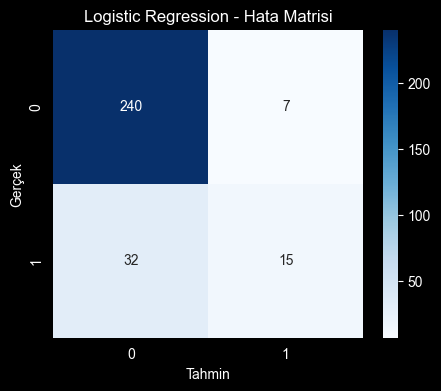

In [5]:
# KOD BLOĞU #5: Model 1 - Logistic Regression
# En basit sınıflandırma modeli
# Her özelliğe ağırlık verir, ağırlıklı toplam 0.5'ten büyükse → Churn=1

print("=" * 10)
print("MODEL 1: LOGISTIC REGRESSION")

# Modeli oluştur ve eğit
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Tahmin yap
y_pred_log = log_model.predict(X_test)

# Sonuçları kaydet
log_accuracy = accuracy_score(y_test, y_pred_log)

print(f"\nAccuracy: {log_accuracy:.4f} ({log_accuracy*100:.2f}%)")
print("\nDetaylı Rapor:")
print(classification_report(y_test, y_pred_log))

# Hata Matrisi
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Hata Matrisi")
plt.ylabel('Gerçek')
plt.xlabel('Tahmin')
plt.show()

MODEL 2: RANDOM FOREST

Accuracy: 0.8367 (83.67%)

Detaylı Rapor:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       247
           1       0.47      0.15      0.23        47

    accuracy                           0.84       294
   macro avg       0.66      0.56      0.57       294
weighted avg       0.79      0.84      0.80       294



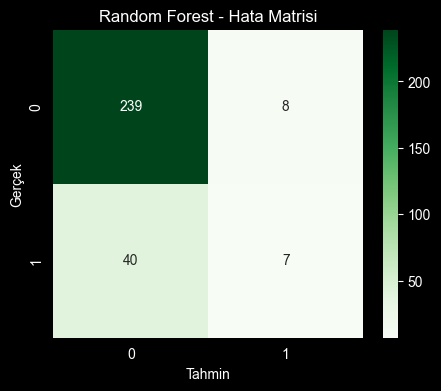

In [6]:
# KOD BLOĞU #6: Model 2 - Random Forest
# Birden fazla karar ağacı oluşturur (100 ağaç)
# Tüm ağaçlar oy kullanır, çoğunluk kazanır

print("=" * 10)
print("MODEL 2: RANDOM FOREST")

# Modeli oluştur ve eğit
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Tahmin yap
y_pred_rf = rf_model.predict(X_test)

# Sonuçları kaydet
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"\nAccuracy: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")
print("\nDetaylı Rapor:")
print(classification_report(y_test, y_pred_rf))

# Hata Matrisi
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Hata Matrisi")
plt.ylabel('Gerçek')
plt.xlabel('Tahmin')
plt.show()

MODEL 3: XGBOOST

Accuracy: 0.8469 (84.69%)

Detaylı Rapor:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       247
           1       0.54      0.30      0.38        47

    accuracy                           0.85       294
   macro avg       0.71      0.62      0.65       294
weighted avg       0.82      0.85      0.83       294



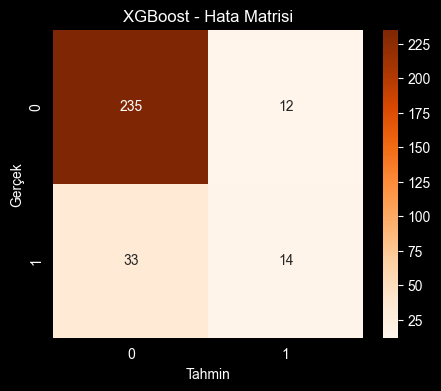

In [7]:
# KOD BLOĞU #7: Model 3 - XGBoost
# Gradient boosting tekniği kullanır
# Her yeni ağaç, önceki ağacın hatalarını düzeltmeye çalışır

print("=" * 10)
print("MODEL 3: XGBOOST")
print("=" * 10)

# Modeli oluştur ve eğit
# logloss: Modelin tahminlerindeki güveni de ölçer
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Tahmin yap
y_pred_xgb = xgb_model.predict(X_test)

# Sonuçları kaydet
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

print(f"\nAccuracy: {xgb_accuracy:.4f} ({xgb_accuracy*100:.2f}%)")
print("\nDetaylı Rapor:")
print(classification_report(y_test, y_pred_xgb))

# Hata Matrisi
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Oranges')
plt.title("XGBoost - Hata Matrisi")
plt.ylabel('Gerçek')
plt.xlabel('Tahmin')
plt.show()

GELİŞMİŞ MODEL KARŞILAŞTIRMA

DETAYLI PERFORMANS TABLOSU:
----------
              Model  Accuracy  F1 Score   Recall  Precision
Logistic Regression  0.867347  0.434783 0.319149   0.681818
      Random Forest  0.836735  0.225806 0.148936   0.466667
            XGBoost  0.846939  0.383562 0.297872   0.538462

EN İYİ MODEL: Logistic Regression
Accuracy:  0.8673 (86.73%)
F1 Score:  0.4348 (Precision ve Recall dengesi)
Recall:    0.3191 (Churn'leri yakalama oranı)


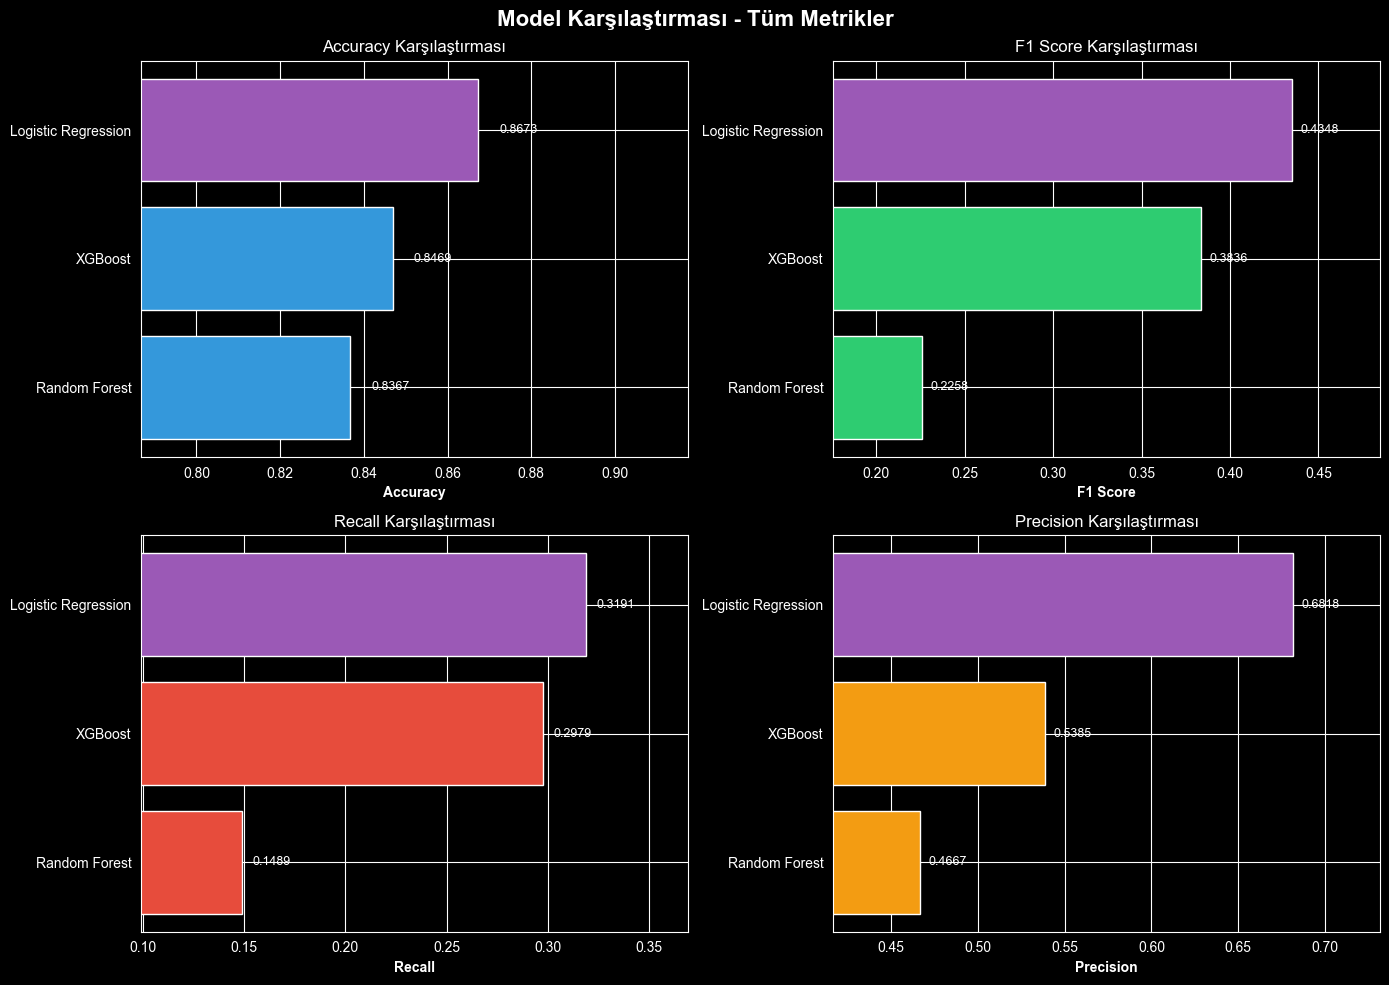


SONUÇ:
Bu veri seti için Logistic Regression modeli en iyi performansı gösterdi.
Model, test verisinde 86.73% doğruluk ve 0.4348 F1 Score'a ulaştı.
Recall: 0.3191 - Model churn olacak müşterilerin %31.9'ini yakalayabiliyor.


In [8]:
# KOD BLOĞU #8: Model Karşılaştırma ve Sonuç
print("=" * 10)
print("GELİŞMİŞ MODEL KARŞILAŞTIRMA")
print("=" * 10)

# Tüm metrikleri hesapla
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [
        log_accuracy,
        rf_accuracy,
        xgb_accuracy
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ],
    'Recall': [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb)
    ]
}

results_df = pd.DataFrame(results)

print("\nDETAYLI PERFORMANS TABLOSU:")
print("-" * 10)
print(results_df.to_string(index=False))

# En iyi modeli F1 Score'a göre seç (daha dengeli metrik)
best_idx = results_df['F1 Score'].idxmax()
best_model_name = results_df.iloc[best_idx]['Model']
best_f1 = results_df.iloc[best_idx]['F1 Score']
best_accuracy = results_df.iloc[best_idx]['Accuracy']
best_recall = results_df.iloc[best_idx]['Recall']

print("\n" + "=" * 10)
print(f"EN İYİ MODEL: {best_model_name}")
print(f"Accuracy:  {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"F1 Score:  {best_f1:.4f} (Precision ve Recall dengesi)")
print(f"Recall:    {best_recall:.4f} (Churn'leri yakalama oranı)")
print("=" * 10)

# Görsel karşılaştırma - Tüm metrikler
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Karşılaştırması - Tüm Metrikler', fontsize=16, fontweight='bold')

metrics = ['Accuracy', 'F1 Score', 'Recall', 'Precision']
colors_palette = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']

for idx, (ax, metric) in enumerate(zip(axes.flat, metrics)):
    sorted_df = results_df.sort_values(metric, ascending=True)
    colors = [colors_palette[idx] if m != best_model_name else '#9b59b6' for m in sorted_df['Model']]

    bars = ax.barh(sorted_df['Model'], sorted_df[metric], color=colors)
    ax.set_xlabel(metric, fontweight='bold')
    ax.set_title(f'{metric} Karşılaştırması')

    # Değerleri göster
    for bar, val in zip(bars, sorted_df[metric]):
        ax.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
                f'{val:.4f}', va='center', fontsize=9)

    # X ekseni sınırlarını ayarla
    min_val = sorted_df[metric].min()
    max_val = sorted_df[metric].max()
    ax.set_xlim(min_val - 0.05, max_val + 0.05)

plt.tight_layout()
plt.show()

print("\nSONUÇ:")
print(f"Bu veri seti için {best_model_name} modeli en iyi performansı gösterdi.")
print(f"Model, test verisinde {best_accuracy*100:.2f}% doğruluk ve {best_f1:.4f} F1 Score'a ulaştı.")
print(f"Recall: {best_recall:.4f} - Model churn olacak müşterilerin %{best_recall*100:.1f}'ini yakalayabiliyor.")


In [9]:
# KOD BLOĞU #9: Cross-Validation (Çapraz Doğrulama)

print("=" * 10)
print("CROSS-VALIDATION (ÇAPRAZ DOĞRULAMA)")
print("=" * 10)

print("\n5 katlı çapraz doğrulama yapılıyor...")
print("-" * 10)

# Her model için CV skorları
cv_results = {}

# Logistic Regression CV
log_cv = cross_val_score(LogisticRegression(max_iter=1000, random_state=42),
                         X_train, y_train, cv=5, scoring='f1')
cv_results['Logistic Regression'] = log_cv
print(f"Logistic Regression: {log_cv.mean():.4f} (+/- {log_cv.std():.4f})")

# Random Forest CV
rf_cv = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42),
                        X_train, y_train, cv=5, scoring='f1')
cv_results['Random Forest'] = rf_cv
print(f"Random Forest:       {rf_cv.mean():.4f} (+/- {rf_cv.std():.4f})")

# XGBoost CV
xgb_cv = cross_val_score(XGBClassifier(eval_metric='logloss', random_state=42),
                         X_train, y_train, cv=5, scoring='f1')
cv_results['XGBoost'] = xgb_cv
print(f"XGBoost:             {xgb_cv.mean():.4f} (+/- {xgb_cv.std():.4f})")

# En kararlı model
std_scores = {k: v.std() for k, v in cv_results.items()}
most_stable = min(std_scores, key=std_scores.get)
print(f"\n✓ En kararlı model: {most_stable} (std: {std_scores[most_stable]:.4f})")


CROSS-VALIDATION (ÇAPRAZ DOĞRULAMA)

5 katlı çapraz doğrulama yapılıyor...
----------
Logistic Regression: 0.4610 (+/- 0.0577)
Random Forest:       0.2999 (+/- 0.0468)
XGBoost:             0.4019 (+/- 0.0480)

✓ En kararlı model: Random Forest (std: 0.0468)


In [10]:
# KOD BLOĞU #10: Hiperparametre Optimizasyonu (GridSearchCV)
print("=" * 10)
print("HİPERPARAMETRE OPTİMİZASYONU")
print("=" * 10)

# XGBoost için basit GridSearch
print("\nXGBoost için GridSearchCV...")
print("-" * 10)

param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.2]
}

grid_search = GridSearchCV(
    XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"En iyi parametreler: {grid_search.best_params_}")
print(f"En iyi CV F1 skoru:  {grid_search.best_score_:.4f}")

# Optimize edilmiş model ile tahmin
y_pred_optimized = grid_search.best_estimator_.predict(X_test)
optimized_f1 = f1_score(y_test, y_pred_optimized)
print(f"Test F1 skoru:       {optimized_f1:.4f}")

# Karşılaştırma
improvement = (optimized_f1 - f1_score(y_test, y_pred_xgb)) * 100
print(f"\n✓ İyileştirme: {improvement:+.2f}% F1 artışı")


HİPERPARAMETRE OPTİMİZASYONU

XGBoost için GridSearchCV...
----------
En iyi parametreler: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
En iyi CV F1 skoru:  0.4638
Test F1 skoru:       0.3714

✓ İyileştirme: -1.21% F1 artışı


FEATURE IMPORTANCE (ÖZELLİK ÖNEMİ)

En önemli 10 özellik:
----------
[  5] Aylik_Gelir                    | 0.0894
[  7] Toplam_Calisma_Yili            | 0.0830
[ 30] NEW_Ratio_1_2                  | 0.0816
[  1] Yas                            | 0.0794
[  8] Sirketteki_Yil                 | 0.0611
[  2] Evden_Uzaklik                  | 0.0550
[  6] Onceki_Sirket_Sayisi           | 0.0500
[ 12] Maas_Artis_Yuzdesi             | 0.0475
[ 14] Mevcut_Mudurle_Yil             | 0.0460
[ 26] Fazla_Mesai_Hayır              | 0.0427


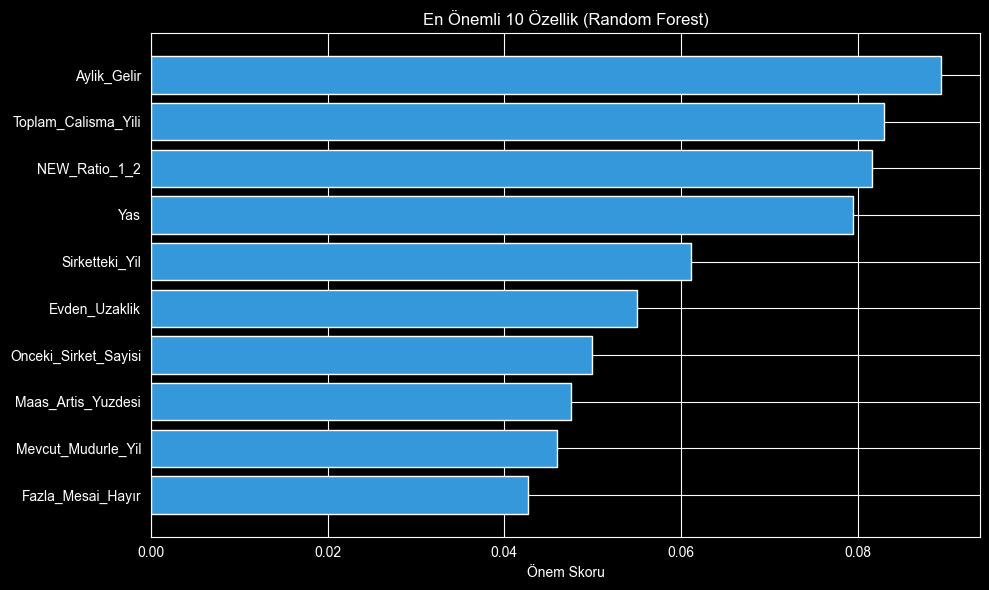

In [11]:
# KOD BLOĞU #11: Feature Importance (Özellik Önemi)
print("=" * 10)
print("FEATURE IMPORTANCE (ÖZELLİK ÖNEMİ)")
print("=" * 10)

# Random Forest'tan özellik önemlerini al
feature_importance = pd.DataFrame({
    'Özellik': X.columns,
    'Önem': rf_model.feature_importances_
}).sort_values('Önem', ascending=False)

# En önemli 10 özellik
print("\nEn önemli 10 özellik:")
print("-" * 10)
for i, row in feature_importance.head(10).iterrows():
    col_no = get_column_number(COLUMN_MAP, row['Özellik']) or '-'
    print(f"[{col_no:>3}] {row['Özellik']:<30} | {row['Önem']:.4f}")

# Görselleştirme
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(top_features['Özellik'], top_features['Önem'], color='#3498db')
plt.xlabel('Önem Skoru')
plt.title('En Önemli 10 Özellik (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


ROC-AUC ANALİZİ

ROC-AUC Skorları:
----------
Logistic Regression: 0.8159
Random Forest:       0.7769
XGBoost:             0.7957


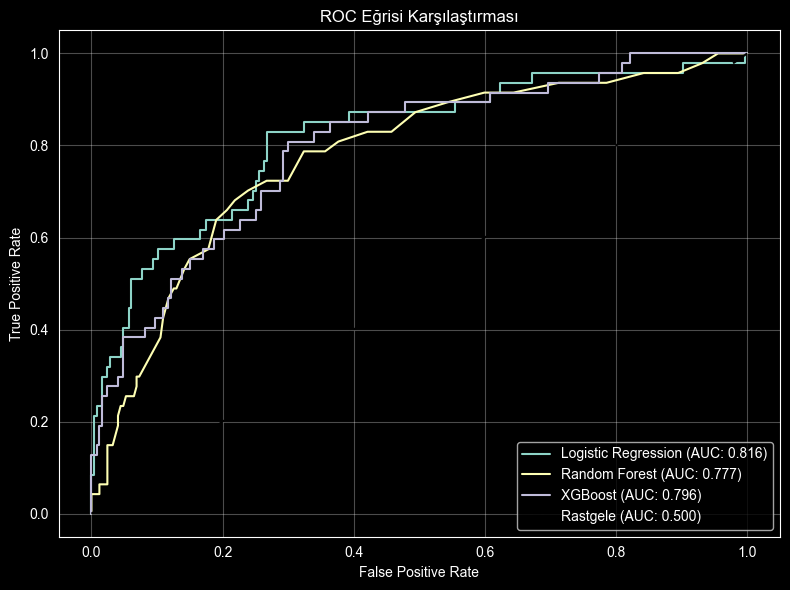


✓ En yüksek AUC: Logistic Regression (0.8159)


In [12]:
# KOD BLOĞU #12: ROC-AUC Analizi
print("=" * 10)
print("ROC-AUC ANALİZİ")
print("=" * 10)

# Her model için olasılık tahminleri
y_prob_log = log_model.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# AUC skorları
auc_log = roc_auc_score(y_test, y_prob_log)
auc_rf = roc_auc_score(y_test, y_prob_rf)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

print("\nROC-AUC Skorları:")
print("-" * 10)
print(f"Logistic Regression: {auc_log:.4f}")
print(f"Random Forest:       {auc_rf:.4f}")
print(f"XGBoost:             {auc_xgb:.4f}")

# ROC eğrisi çizimi
plt.figure(figsize=(8, 6))

for name, y_prob, auc in [('Logistic Regression', y_prob_log, auc_log),
                           ('Random Forest', y_prob_rf, auc_rf),
                           ('XGBoost', y_prob_xgb, auc_xgb)]:
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC: {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Rastgele (AUC: 0.500)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi Karşılaştırması')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# En iyi AUC
best_auc_model = max([('Logistic Regression', auc_log),
                      ('Random Forest', auc_rf),
                      ('XGBoost', auc_xgb)], key=lambda x: x[1])
print(f"\n✓ En yüksek AUC: {best_auc_model[0]} ({best_auc_model[1]:.4f})")

